# Virtual Mouse

#### Rancangan akhir *virtual mouse* menggunakan model **Custom Convolutional Neural Network**

#### Importing Library

In [1]:
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import random

2024-11-14 23:21:23.423580: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-14 23:21:23.430504: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-14 23:21:23.495785: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-14 23:21:23.580217: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-14 23:21:23.661839: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

#### Data Preparation

In [2]:
datasets_dir = './datasets'
datasets_train_dir = os.path.join(datasets_dir, 'data_training')

In [3]:
categories = ['control_volume', 'drag_mouse', 'mouse_click', 'moving_cursor', 'right_click']

##### change image to array

In [4]:
for category in categories:
    path = os.path.join(datasets_train_dir, category)
    for img in os.listdir(path):
        image_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        

In [5]:
print(image_array.shape)

(300, 300)


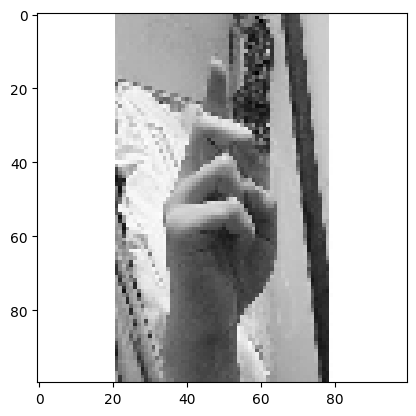

In [6]:
img_size = 100

img_array_resized = cv2.resize(image_array, (img_size, img_size))
plt.imshow(img_array_resized, cmap='gray')
plt.show()

(-0.5, 99.5, 99.5, -0.5)

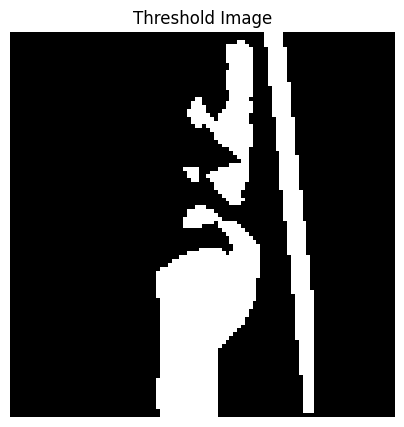

In [7]:
_, thresholded_image = cv2.threshold(img_array_resized, 100, 200, cv2.THRESH_BINARY_INV)
plt.figure(figsize=(5,5))
blurred_image = cv2.medianBlur(thresholded_image, 5)
plt.imshow(blurred_image, cmap='gray')
plt.title("Threshold Image")
plt.axis('off')

##### data labeling

In [8]:
training_data = []

def create_training_data():
    for category in categories:
        path = os.path.join(datasets_train_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                image_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                img_array_resized = cv2.resize(image_array, (img_size, img_size))
                _, thresholded_image = cv2.threshold(img_array_resized, 150, 200, cv2.THRESH_BINARY_INV)
                blurred_image = cv2.medianBlur(thresholded_image, 5)
                training_data.append([blurred_image,class_num])
            except Exception as e:
                pass

create_training_data()

In [9]:
print(len(training_data))

15475


##### shuffle data X for training

In [10]:
import random

random.shuffle(training_data)

In [11]:
for sample in training_data:
    print(sample[1])
    print(sample[0])

4
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
1
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
2
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
2
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
3
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
4
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
2
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
4
[[0 0 0 ... 0 0 0]
 [0

##### seperate data X and label y

In [12]:
X = []
y = []

In [13]:
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 1)
X.shape

(15475, 100, 100, 1)

##### normalization X

In [14]:
X = X / 255
print(X)

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

In [15]:
print(X.shape)

(15475, 100, 100, 1)


#### Split data testing and training

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=30)


In [17]:
print(x_train.shape)
print(y_train)

(12380, 100, 100, 1)
[4, 3, 3, 2, 1, 0, 1, 1, 4, 3, 4, 3, 3, 3, 4, 1, 1, 4, 2, 1, 0, 4, 1, 4, 3, 3, 0, 3, 1, 4, 1, 4, 3, 4, 3, 3, 2, 2, 3, 4, 2, 4, 1, 4, 0, 4, 2, 1, 2, 3, 4, 1, 4, 3, 4, 0, 1, 4, 1, 2, 0, 4, 4, 2, 0, 1, 3, 3, 4, 0, 1, 2, 3, 1, 1, 2, 3, 0, 4, 4, 4, 0, 4, 2, 1, 4, 2, 4, 1, 3, 3, 1, 2, 0, 0, 2, 0, 3, 3, 0, 1, 4, 4, 4, 3, 2, 4, 0, 3, 1, 0, 3, 3, 4, 4, 3, 0, 1, 2, 0, 1, 2, 1, 3, 1, 0, 0, 3, 3, 0, 4, 3, 4, 2, 4, 3, 4, 0, 4, 4, 4, 0, 0, 0, 2, 0, 4, 1, 0, 1, 1, 3, 3, 2, 1, 1, 2, 0, 1, 2, 0, 3, 0, 1, 3, 3, 3, 1, 2, 1, 3, 4, 3, 3, 2, 3, 2, 3, 4, 4, 4, 2, 4, 0, 3, 3, 1, 3, 0, 2, 3, 2, 0, 0, 0, 1, 0, 3, 3, 2, 3, 1, 4, 3, 1, 1, 4, 4, 1, 4, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 4, 1, 2, 0, 4, 3, 2, 2, 4, 0, 1, 0, 3, 2, 1, 2, 2, 4, 4, 0, 1, 2, 4, 3, 1, 1, 2, 2, 2, 3, 2, 4, 4, 3, 3, 1, 1, 1, 3, 1, 1, 0, 0, 1, 0, 4, 1, 3, 1, 4, 3, 2, 0, 0, 2, 1, 0, 0, 4, 3, 3, 0, 3, 0, 4, 3, 0, 3, 1, 0, 4, 1, 3, 2, 3, 1, 4, 1, 1, 0, 4, 1, 4, 3, 1, 3, 0, 0, 3, 0, 4, 3, 4, 0, 2, 3, 1, 4, 0, 4, 3, 1, 3, 3, 3, 3, 

In [18]:
print(x_test.shape)
print(y_test)

(3095, 100, 100, 1)
[1, 2, 3, 3, 2, 1, 1, 3, 4, 2, 2, 1, 3, 3, 2, 3, 4, 2, 0, 0, 0, 0, 1, 2, 3, 2, 2, 0, 4, 3, 0, 0, 4, 2, 3, 3, 2, 3, 0, 0, 3, 3, 4, 3, 3, 3, 1, 1, 2, 0, 1, 1, 4, 4, 3, 4, 1, 2, 1, 3, 0, 1, 3, 1, 3, 4, 3, 3, 2, 4, 1, 2, 1, 3, 3, 2, 1, 3, 4, 1, 4, 0, 3, 0, 0, 3, 1, 3, 0, 1, 2, 2, 3, 3, 1, 3, 3, 2, 1, 1, 4, 0, 4, 1, 2, 2, 0, 0, 2, 3, 4, 1, 0, 3, 4, 1, 2, 1, 1, 1, 2, 4, 3, 2, 1, 0, 1, 4, 0, 3, 2, 3, 0, 2, 0, 1, 4, 4, 4, 1, 2, 1, 2, 1, 4, 1, 3, 4, 0, 0, 4, 3, 2, 3, 3, 4, 0, 1, 0, 1, 1, 2, 2, 3, 4, 0, 4, 3, 3, 3, 4, 0, 4, 0, 1, 4, 0, 2, 0, 1, 1, 0, 3, 4, 2, 4, 0, 3, 3, 1, 2, 0, 0, 0, 3, 4, 1, 3, 1, 0, 2, 1, 4, 3, 3, 3, 4, 1, 0, 3, 0, 3, 2, 1, 2, 3, 0, 1, 1, 2, 1, 2, 2, 3, 0, 3, 1, 4, 4, 4, 4, 2, 3, 3, 4, 4, 0, 2, 2, 4, 4, 2, 4, 4, 3, 2, 2, 4, 0, 4, 2, 0, 1, 3, 1, 1, 4, 2, 4, 0, 1, 2, 3, 2, 0, 0, 3, 3, 1, 3, 3, 0, 1, 1, 4, 2, 3, 3, 3, 0, 2, 2, 1, 1, 1, 3, 2, 0, 4, 0, 1, 1, 4, 1, 4, 1, 0, 4, 2, 2, 0, 0, 3, 0, 0, 0, 4, 3, 2, 2, 3, 0, 4, 4, 1, 1, 3, 2, 2, 2, 2, 2, 0, 0, 3, 1, 1

#### Make Custom CNN Model

In [19]:
custom_cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), input_shape = X.shape[1:], activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

custom_cnn.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])



/home/steven/Projects/python/comvis/virtual_mouse/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,TensorBoard

logdir = "logs_final_3_hidden/"
tensorboard_callback = TensorBoard(log_dir=logdir)

#### Train data

In [21]:
# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=2)

# Model checkpoint callback - save the best model based on validation loss
model_checkpoint = ModelCheckpoint('best_custom_cnn_model_final_3_hidden.keras', monitor='val_loss', save_best_only=True, verbose=1)

x_train = np.array(x_train)
y_train = np.array(y_train)
custom_cnn.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stop, model_checkpoint, tensorboard_callback])

Epoch 1/50
348/349 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.2571 - loss: 1.5412
Epoch 1: val_loss improved from inf to 0.56405, saving model to best_custom_cnn_model_final_3_hidden.keras
349/349 ━━━━━━━━━━━━━━━━━━━━ 45s 123ms/step - accuracy: 0.2578 - loss: 1.5400 - val_accuracy: 0.8441 - val_loss: 0.5641
Epoch 2/50
348/349 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.7438 - loss: 0.6591
Epoch 2: val_loss improved from 0.56405 to 0.12912, saving model to best_custom_cnn_model_final_3_hidden.keras
349/349 ━━━━━━━━━━━━━━━━━━━━ 42s 122ms/step - accuracy: 0.7442 - loss: 0.6584 - val_accuracy: 0.9677 - val_loss: 0.1291
Epoch 3/50
348/349 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8951 - loss: 0.2958
Epoch 3: val_loss improved from 0.12912 to 0.03960, saving model to best_custom_cnn_model_final_3_hidden.keras
349/349 ━━━━━━━━━━━━━━━━━━━━ 43s 123ms/step - accuracy: 0.8951 - loss: 0.2956 - val_accuracy: 0.9863 - val_loss: 0.0396
Epoch 4/50
348/349 ━━━━━━━━━━━━━━━━━━━━ 0s 144m

#### Evaluate Model

In [22]:
x_test = np.array(x_test)
y_test = np.array(y_test)
custom_cnn.evaluate(x_test, y_test)

97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9994 - loss: 0.0018


[0.004643046762794256, 0.9990307092666626]

In [23]:
custom_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,768,273 (10.56 MB)

 Trainable params: 922,757 (3.52 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,845,516 (7.04 MB)

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = custom_cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification report: \n", classification_report(y_test, y_pred_classes))
print("Confusion Matrix \n", confusion_matrix(y_test, y_pred_classes))

97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       630
           1       1.00      1.00      1.00       637
           2       1.00      1.00      1.00       630
           3       1.00      1.00      1.00       626
           4       1.00      1.00      1.00       572

    accuracy                           1.00      3095
   macro avg       1.00      1.00      1.00      3095
weighted avg       1.00      1.00      1.00      3095

Confusion Matrix 
 [[630   0   0   0   0]
 [  0 637   0   0   0]
 [  0   1 628   0   1]
 [  0   0   0 625   1]
 [  0   0   0   0 572]]


In [25]:
import matplotlib.pyplot as plt

def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(categories[y[index]])

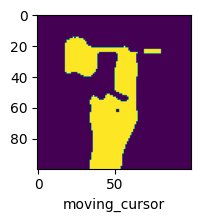

In [26]:
y_pred_classes = np.array(y_pred_classes)
plot_sample(x_test, y_pred_classes, 7)

In [27]:
y_pred_classes[:15]


array([1, 2, 3, 3, 2, 1, 1, 3, 4, 2, 2, 1, 3, 3, 2])

In [28]:
y_test[:15]

array([1, 2, 3, 3, 2, 1, 1, 3, 4, 2, 2, 1, 3, 3, 2])

In [29]:
mvDir = "datasets/data_training/moving_cursor"
print(len(os.listdir(mvDir)))

3095


In [30]:
dmDir = "datasets/data_training/drag_mouse"
print(len(os.listdir(dmDir)))

3095


In [31]:
mcDir = "datasets/data_training/mouse_click"
print(len(os.listdir(mcDir)))

3095


In [32]:
cvDir = "datasets/data_training/control_volume"
print(len(os.listdir(cvDir)))

3095


In [33]:
rcDir = "datasets/data_training/right_click"
print(len(os.listdir(rcDir)))

3095
